In [2]:
# !pip install -qU python-gdcm pydicom pylibjpeg
# !pip install -U pylibjpeg-libjpeg -v
# !pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg
# !pip install pydicom

# import include nesscessaryz
import cv2
from PIL import Image, ImageOps
import argparse
import os
import glob
import matplotlib.pyplot as plt
import multiprocessing as mp
from joblib import Parallel, delayed
import pydicom
import time
import numpy as np
import torch
import random
import pandas as pd
from pydicom.pixel_data_handlers import apply_windowing
import imageio
import time
import shutil

In [3]:
img_origin1 = cv2.imread(r"D:\OneDrive - Industrial University of HoChiMinh City\WORKBASE\Project-rsna-breast-cancer-detection\Notebook_code\Thu_nghiem_img\1511_764545189.png")
img_origin2 = cv2.imread(r"D:\OneDrive - Industrial University of HoChiMinh City\WORKBASE\Project-rsna-breast-cancer-detection\Notebook_code\Thu_nghiem_img\294_1091299886.png")
img_origin3 = cv2.imread(r"D:\OneDrive - Industrial University of HoChiMinh City\WORKBASE\Project-rsna-breast-cancer-detection\Notebook_code\Thu_nghiem_img\s1.png")

###

# Phân tích các cách chọn ngưỡng 

##  Ngưỡng theo adapted 

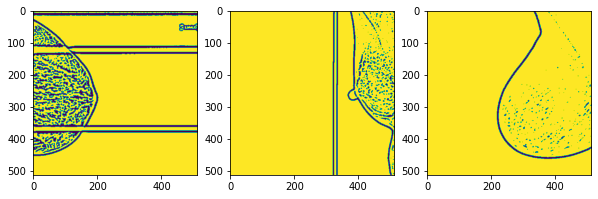

In [4]:
#  Ngưỡng theo adapted 
def adap(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)

    adap_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)
    return adap_thresh

fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()

axis[0].imshow(adap(img_origin1).astype(np.float32))
axis[1].imshow(adap(img_origin2).astype(np.float32))
axis[2].imshow(adap(img_origin3).astype(np.float32))
# adap(img_origin1).astype(np.float32)

In [5]:
from scipy import stats as sst

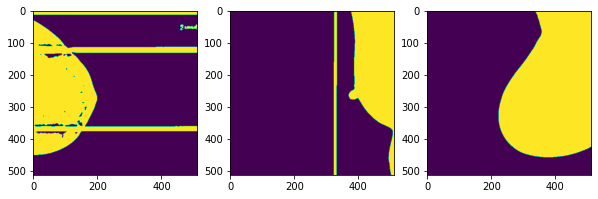

In [6]:
def trimmed_mean(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    level = sst.trim_mean(blurred.flatten(), 0.1) 
    ret, thresh_binary = cv2.threshold(blurred, level, 255, cv2.THRESH_BINARY)

    return thresh_binary

fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()

axis[0].imshow(trimmed_mean(img_origin1).astype(np.float32))
axis[1].imshow(trimmed_mean(img_origin2).astype(np.float32))
axis[2].imshow(trimmed_mean(img_origin3).astype(np.float32))

7.0
0.0
64.0


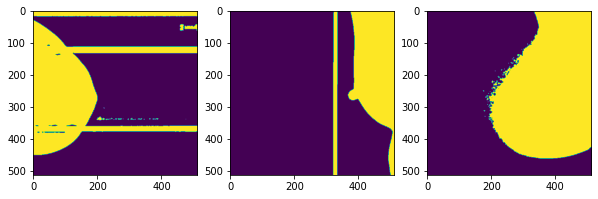

In [7]:
def trimmed_median(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    level = np.median(blurred.flatten(), axis=0)
    print(level)
    ret, thresh_binary = cv2.threshold(blurred, level, 255, cv2.THRESH_BINARY)

    return thresh_binary

fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()

axis[0].imshow(trimmed_median(img_origin1).astype(np.float32))
axis[1].imshow(trimmed_median(img_origin2).astype(np.float32))
axis[2].imshow(trimmed_median(img_origin3).astype(np.float32))

## Phân phối pixel theo cột 

(512, 512)
(512, 512)
(512, 512)


<BarContainer object of 512 artists>

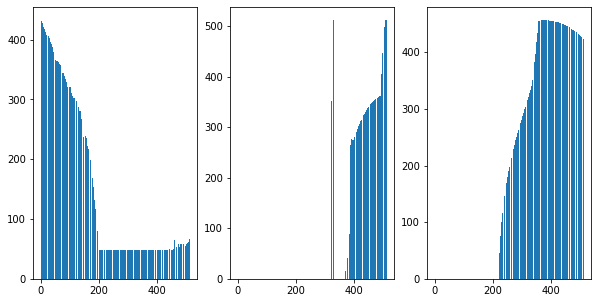

In [8]:
def distributed_columns(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    level = sst.trim_mean(blurred.flatten(), 0.1) 
    ret, thresh_binary = cv2.threshold(blurred, level, 255, cv2.THRESH_BINARY)
    h, w = thresh_binary.shape
    print(thresh_binary.shape)
    thresh_binary = thresh_binary/255
    ls = []
    for i in range(w):
        x = np.sum(thresh_binary[:, i])
        ls.append(x)
    # plt.bar(list(range(len(ls))), ls)
    return ls
# ls = distributed_columns(img_origin1)
# plt.bar(list(range(len(ls))), ls)
l1 = distributed_columns(img_origin1)
l2 = distributed_columns(img_origin2)
l3 = distributed_columns(img_origin3)
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()
axis[0].bar(list(range(len(l1))), l1)
axis[1].bar(list(range(len(l2))), l2)
axis[2].bar(list(range(len(l3))), l3)
# axis[2].imshow(distributed_columns(img_origin3))
# print(ls)

(512, 512)
(512, 512)
(512, 512)


<BarContainer object of 512 artists>

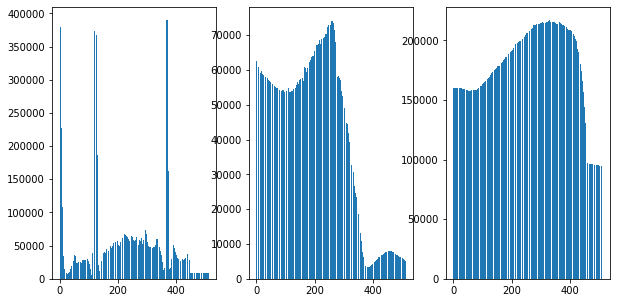

In [8]:
def distributed_row(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    level = sst.trim_mean(blurred.flatten(), 0.1) 
    ret, thresh_binary = cv2.threshold(blurred, level, 255, cv2.THRESH_BINARY)
    h, w = thresh_binary.shape
    print(thresh_binary.shape)
    thresh_binary = thresh_binary/255
    ls = []
    for i in range(h):
        x = np.sum(img[i, :])
        ls.append(x)
    # plt.bar(list(range(len(ls))), ls)
    return ls
# ls = distributed_columns(img_origin1)
# plt.bar(list(range(len(ls))), ls)
l1 = distributed_row(img_origin1)
l2 = distributed_row(img_origin2)
l3 = distributed_row(img_origin3)
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()
axis[0].bar(list(range(len(l1))), l1)
axis[1].bar(list(range(len(l2))), l2)
axis[2].bar(list(range(len(l3))), l3)
# axis[2].imshow(distributed_columns(img_origin3))
# print(ls)

In [9]:
from crop_image_for_you import *

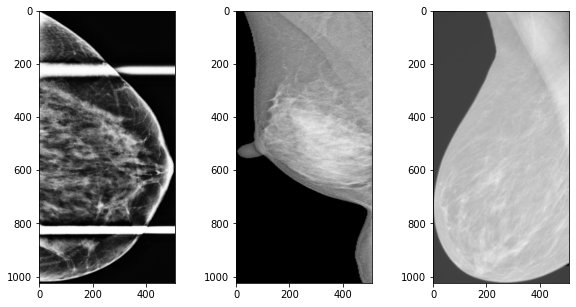

In [10]:
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()

axis[0].imshow(process_crop(img_origin1))
axis[1].imshow(process_crop(img_origin2))
axis[2].imshow(process_crop(img_origin3))

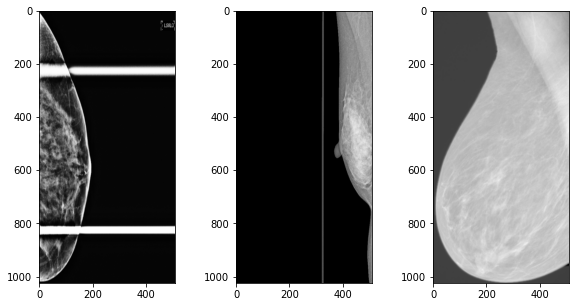

In [12]:
fig, axis = plt.subplots(1, 3, figsize=(10, 5))
axis.flatten()
ds = Process_Data(None)
axis[0].imshow(ds.ConnectedComponents(img_origin1))
axis[1].imshow(ds.ConnectedComponents(img_origin2))
axis[2].imshow(ds.ConnectedComponents(img_origin3))